In [1]:
import pandas as pd
import numpy as np
import cptac
import cnvutils
import cptac.utils as ut
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CHROMOSOME = '8'

In [3]:
cnv = {
    'BRCA': cptac.Brca().get_CNV(),
    'CCRCC': cptac.Ccrcc().get_CNV(),
    'COLON': cptac.Colon().get_CNV(),
    'ENDO': cptac.Endometrial().get_CNV(),
    'GBM': cptac.Gbm().get_CNV(),
    'HNSCC': cptac.Hnscc().get_CNV(),
    'LSCC': cptac.Lscc().get_CNV(),
    'LUAD': cptac.Luad().get_CNV(),
    'OVARIAN': cptac.Ovarian().get_CNV()
}

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/home/caleb/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/home/caleb/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/home/caleb/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [4]:
gene_locations = cnvutils.get_gene_locations()

In [5]:
def get_gain_counts(row):
    gain = len(row[row > 0.2])
    return gain

In [6]:
def get_loss_counts(row):
    loss = len(row[row < -0.2])
    return loss

In [7]:
cnv_8 = dict()
for cancer_type in cnv.keys():
    try:
        df = cnv[cancer_type].transpose()
        df['gain'] = df.apply(get_gain_counts, axis=1)
        df['loss'] = df.apply(get_loss_counts, axis=1)
        df = df.join(gene_locations)
        df = df[df.chromosome == '8']
        cnv_8[cancer_type] = df.melt(id_vars=['start_bp'], value_vars=['gain', 'loss'])
    except:
        print(df)

In [8]:
# I was not able to find a good library for creating a visual of a chromosome
# with their banding patterns, so I wrote this function to do it for me.

# ideogram_data = pd.read_csv('NCBI_ideogram.csv') #cytoband infromation from NCBI
ideogram_data = cnvutils.get_cytoband_info()
chromo8 = ideogram_data[ideogram_data['#chromosome'] == CHROMOSOME]
colors = []
sections = list()
for index, row in chromo8.iterrows():
  sections.append((row['bp_start'], row['bp_stop']-row['bp_start']))
  if row['stain'] == 'gneg':
    colors.append('white')
  elif row['stain'] == 'gpos':
    if row['density'] == 25.0:
      colors.append('lightgray')
    elif row['density'] == 50.0:
      colors.append('gray')
    elif row['density'] == 75.0:
      colors.append('darkgray')
    else:
      colors.append('black')
  elif row['stain'] == 'acen':
    colors.append('red')
  else:
    colors.append('lightgray')

BRCA
CCRCC
COLON
ENDO
GBM
HNSCC
LSCC
LUAD
OVARIAN


Text(0.07, 0.5, 'Number of Samples')

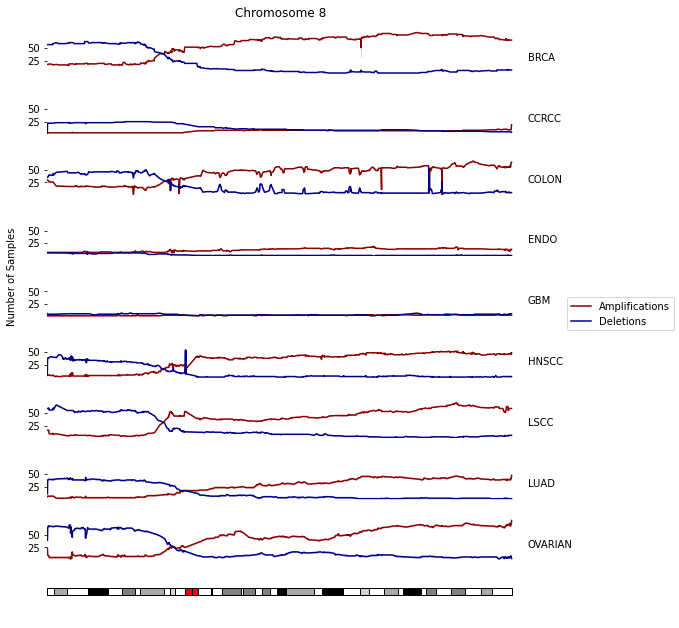

In [9]:
count = 0
end_bp = sections[len(sections) - 1][0] + sections[len(sections) - 1][1]
fig, axs = plt.subplots(nrows=len(cnv_8) + 1, sharex=True, sharey=True, num=0, figsize=(10,11), )
title = f'Chromosome 8'
fig.suptitle(title, y=0.9, x=0.45)
plt.xlim(0,175138636)
plt.xlim(0,end_bp + (end_bp/5))
plt.ylim(0, 100)
for cancer in cnv_8.keys():
    print(cancer)
    frame = cnv_8[cancer]
    axs[count].get_xaxis().set_visible(False)
    axs[count].set_yticks([25,50])
    axs[count].set_frame_on(False)
    axs[count].text(end_bp + 5000000, 25, cancer)
    sns.lineplot(x="start_bp", y="value", hue="variable", palette=['darkred', 'darkblue'], data=frame, ax=axs[count], legend=False)
    axs[count].set_ylabel("")
    count += 1
plt.broken_barh(sections, (50,15), facecolors=colors, edgecolor="black")
plt.axis('off')
fig.legend(labels=("Amplifications", "Deletions"), loc='center right')
fig.text(0.07, 0.5, "Number of Samples", rotation="vertical")